# 연습문제(2) 풀이

## 작업준비

In [75]:
from pca import pca
from pandas import read_excel, DataFrame, merge, melt
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_ols, scalling, get_best_features

## 문제 1

### 데이터 가져오기

In [76]:
df = read_excel("https://data.hossam.kr/E04/diabetes.xlsx")
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220


### 전체 요인에 대한 회귀분석

In [77]:
xnames = list(df.columns)
xnames.remove('target')
xnames

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [78]:
model1 = my_ols(df, y='target', x=xnames)
model1.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           3.83e-62
Time:                        10:37:04   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0099     59.749     -0.168      0.867    -127.446     107.426
sex         -239.8156     61.222     -3.917      0.000    -360.147    -119.484
bmi          519.8459     66.533      7.813      0.000     389.076     650.616
bp           324.3846     65.422      4.958      0.000     195.799     452.970
s1          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
s2           476.7390    339.030      1.406      0.160    -189.620    1143.098
s3           101.0433    212.531      0.475      0.635    -316.684     518.770
s4           177.0632    161.476      1.097      0.273    -140.315     494.441
s5           751.2737    171.900      4.370      0.000     413.407    1089.140
s6            67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 결과표

In [79]:
model1.table

B     표준오차  β        t   유의확률        VIF
종속변수   독립변수                                                  
target age    -10.0099   59.749  0  -0.168*  0.867   1.217315
       sex   -239.8156   61.222  0  -3.917*  0.000   1.283075
       bmi    519.8459   66.533  0   7.813*  0.000   1.532949
       bp     324.3846   65.422  0   4.958*  0.000   1.468583
       s1    -792.1756  416.680  0  -1.901*  0.058  59.257108
       s2     476.7390  339.030  0   1.406*  0.160  39.213144
       s3     101.0433  212.531  0   0.475*  0.635  15.403044
       s4     177.0632  161.476  0   1.097*  0.273   8.893714
       s5     751.2737  171.900  0   4.370*  0.000  10.125073
       s6      67.6267   65.984  0   1.025*  0.306   1.485021

### 차원 축소 적용

#### PCA 분석

In [80]:
pca_model = pca()
fit = pca_model.fit_transform(df.drop('target', axis=1))
topfit = fit['topfeat']
topfit

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,s4,0.428834,best
1,PC2,s1,0.573027,best
2,PC3,bp,0.513571,best
3,PC4,sex,-0.679860,best
4,PC5,age,-0.686876,best
5,PC6,s6,0.805066,best
6,PC7,s5,0.647302,best
7,PC8,bp,-0.477360,best
8,PC7,bmi,-0.519874,weak
9,PC2,s2,0.455942,weak


#### 선정된 요인 이름 추출

In [81]:
best = topfit.query("type=='best'")
feature = list(set(list(best['feature'])))
feature

['s5', 's1', 's4', 'age', 's6', 'sex', 'bp']

#### 선정된 요인을 사용하여 회귀분석 수행

In [82]:
model2 = my_ols(df, y='target', x=feature)
model2.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     48.44
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.06e-50
Time:                        10:37:04   Log-Likelihood:                -2419.6
No. Observations:                 442   AIC:                             4855.
Df Residuals:                     434   BIC:                             4888.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.770     54.932      0.000     146.690     157.577
s5           642.7408     82.452      7.795      0.000     480.686     804.795
s1          -358.8123     74.225     -4.834      0.000    -504.698    -212.927
s4           412.2661     84.704      4.867      0.000     245.785     578.747
age           -8.6419     64.182     -0.135      0.893    -134.789     117.505
s6           150.1445     70.100      2.142      0.033      12.366     287.923
sex         -290.7876     64.800     -4.487      0.000    -418.148    -163.427
bp           456.9719     68.115      6.709      0.000     323.095     590.849
==============================================================================
Omnibus:                        2.903   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.906
Skew:                           0.162   Prob(JB):                        0.234
Kurtosis:                       2.771   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 두 가지 모델의 결과 비교

#### 결과 비교를 위한 데이터프레임 생성

In [83]:
x_train_std_df = df.drop('target', axis=1)

rdf = DataFrame({
    's6': df['s6'],
    'y': df['target'],
    'y1': model1.fit.predict(x_train_std_df),
    'y2': model2.fit.predict(x_train_std_df)
})

rdf

,s6,y,y1,y2
0,-0.017646,151,206.116677,172.007474
1,-0.092204,75,68.071033,82.086360
2,-0.025930,141,176.882790,147.306696
3,-0.009362,206,166.914458,172.080542
4,-0.046641,135,128.462258,145.020055
...,...,...,...,...
437,0.007207,178,193.017565,186.443274
438,0.044485,104,101.055814,98.010573
439,0.015491,132,121.226681,125.962704
440,-0.025930,220,211.858945,195.884545


#### 실제 값과 model1의 예측 결과를 재배치

In [84]:
mdf1 = melt(rdf, id_vars=['s6'], value_vars=['y', 'y1'])
mdf1

,s6,variable,value
0,-0.017646,y,151.000000
1,-0.092204,y,75.000000
2,-0.025930,y,141.000000
3,-0.009362,y,206.000000
4,-0.046641,y,135.000000
...,...,...,...
879,0.007207,y1,193.017565
880,0.044485,y1,101.055814
881,0.015491,y1,121.226681
882,-0.025930,y1,211.858945


#### 실제 값과 model2의 예측 결과 재배치

In [85]:
mdf2 = melt(rdf, id_vars=['s6'], value_vars=['y', 'y2'])
mdf2

,s6,variable,value
0,-0.017646,y,151.000000
1,-0.092204,y,75.000000
2,-0.025930,y,141.000000
3,-0.009362,y,206.000000
4,-0.046641,y,135.000000
...,...,...,...
879,0.007207,y2,186.443274
880,0.044485,y2,98.010573
881,0.015491,y2,125.962704
882,-0.025930,y2,195.884545


#### 각각의 재배치 결과를 시각화

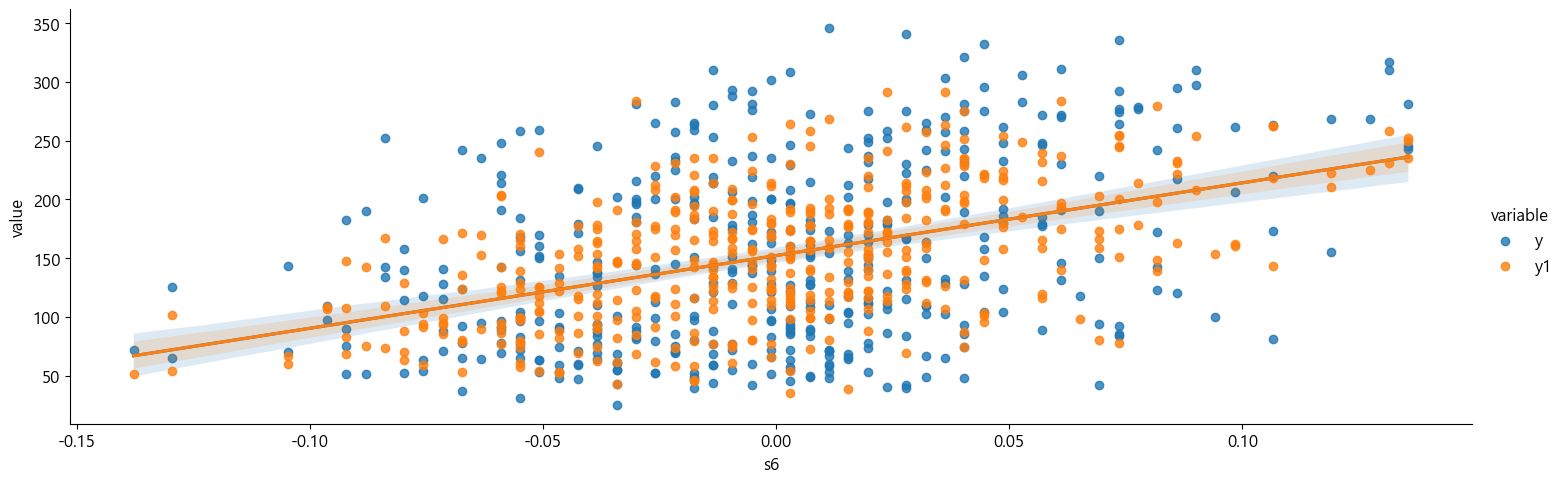

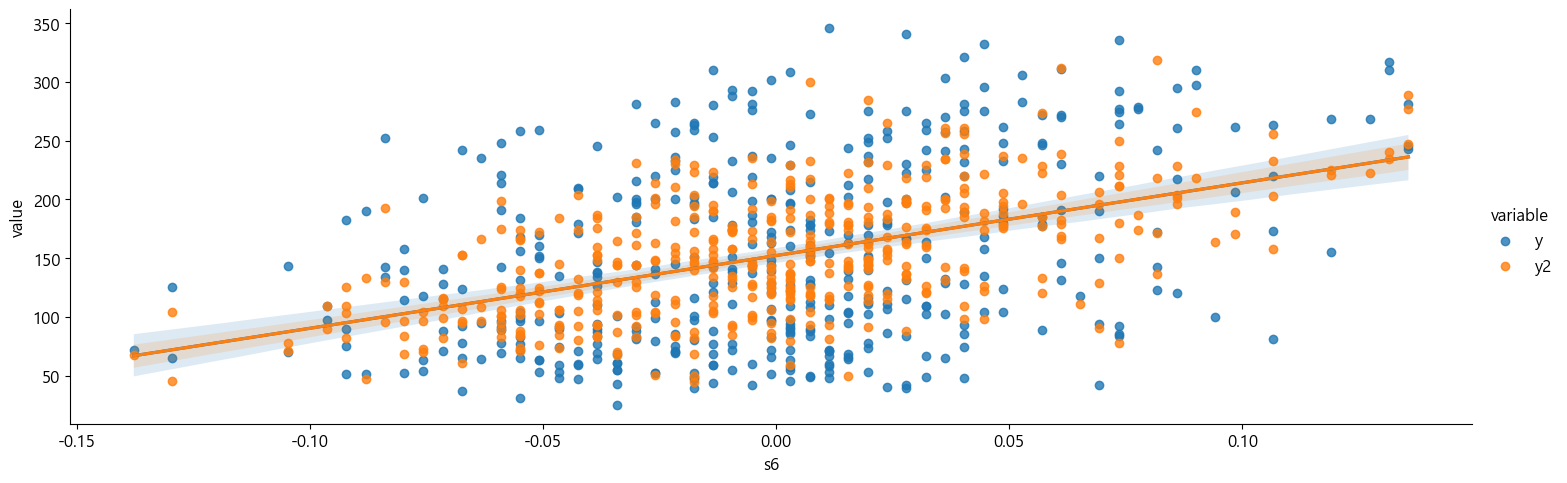

In [86]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["axes.unicode_minus"] = False

sb.lmplot(data=mdf1, x="s6", y="value", hue="variable", height=5, aspect=3)
sb.lmplot(data=mdf2, x="s6", y="value", hue="variable", height=5, aspect=3)

plt.show()
plt.close()

## 문제 2

### 데이터 가져오기

In [87]:
df = read_excel("https://data.hossam.kr/E04/manhattan.xlsx")
df

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


### 데이터 전처리

#### 명목형 변수 확인

값의 종류가 지나치게 많으므로 이 변수는 제외하기로 함

In [88]:
df['neighborhood'].value_counts()

neighborhood
Upper West Side        579
Upper East Side        500
Midtown East           460
Midtown West           314
Financial District     268
Chelsea                182
Flatiron               132
Midtown                119
Tribeca                119
East Village           108
Battery Park City      104
Midtown South           85
Central Harlem          82
West Village            67
Greenwich Village       66
Gramercy Park           61
Soho                    58
Washington Heights      54
East Harlem             41
Lower East Side         41
Central Park South      23
Hamilton Heights        16
Morningside Heights     13
Inwood                  12
Nolita                   9
Chinatown                8
Roosevelt Island         5
Long Island City         4
Stuyvesant Town/PCV      3
Little Italy             3
West Harlem              2
Manhattanville           1
Name: count, dtype: int64

값의 종류가 없으므로 이 변수도 제외하기로 함

In [89]:
df['borough'].value_counts()

borough
Manhattan    3539
Name: count, dtype: int64

#### 불필요한 변수를 제거

In [90]:
df2 = df.drop(['neighborhood', 'borough'], axis=1)
df2.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1


#### 데이터 표준화

In [91]:
x_train_std_df, y_train_std_df = scalling(df2, 'rent')

In [92]:
x_train_std_df.head()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,-1.397410,-0.611790,-0.962011,0.730862,-0.904097,-0.888763,1.21585,2.336243,-0.436784,-0.625393,1.546964,2.094423,-0.241482,2.171931
1,0.669863,1.056257,2.218694,-0.176116,-0.995343,1.117593,-0.82247,-0.428038,-0.436784,-0.625393,-0.646428,-0.477459,-0.241482,-0.460420
2,-0.363774,-0.611790,-0.049651,-0.538908,3.566974,-0.584000,-0.82247,2.336243,-0.436784,1.598995,1.546964,2.094423,-0.241482,-0.460420
3,-0.363774,-0.611790,0.073811,-0.357512,-0.356619,-0.533206,-0.82247,-0.428038,-0.436784,1.598995,1.546964,2.094423,-0.241482,2.171931
4,0.669863,1.056257,8.077886,-0.357512,-0.721604,2.133470,-0.82247,-0.428038,-0.436784,1.598995,1.546964,2.094423,-0.241482,2.171931


In [93]:
y_train_std_df.head()

,rent
0,-0.818669
1,2.011480
2,-0.202044
3,-0.108760
4,3.908786


### PCA

#### 주성분 분석 시행

In [94]:
feature, topfeat_df = get_best_features(x_train_std_df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [14] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]


[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [95]:
topfeat_df

,PC,feature,loading,type
0,PC1,has_elevator,0.453207,best
1,PC2,size_sqft,0.573482,best
2,PC3,building_age_yrs,-0.638744,best
3,PC4,has_patio,0.743626,best
4,PC5,min_to_subway,0.624977,best
5,PC6,min_to_subway,0.672089,best
6,PC7,no_fee,0.666304,best
7,PC8,building_age_yrs,0.673353,best
8,PC9,has_roofdeck,0.801673,best
9,PC10,has_dishwasher,-0.650467,best


In [96]:
feature

['building_age_yrs',
 'has_patio',
 'no_fee',
 'has_gym',
 'size_sqft',
 'has_roofdeck',
 'has_elevator',
 'min_to_subway',
 'has_dishwasher']

In [97]:
mdf = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
ols_result = my_ols(mdf, y='rent', x=feature)
ols_result.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     1221.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:37:07   Log-Likelihood:                -2519.3
No. Observations:                3539   AIC:                             5059.
Df Residuals:                    3529   BIC:                             5120.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9.346e-17      0.008  -1.13e-14      1.000      -0.016       0.016
building_age_yrs    -0.1476      0.009    -16.969      0.000      -0.165      -0.131
has_patio            0.0015      0.008      0.180      0.857      -0.015       0.018
no_fee              -0.0095      0.009     -1.086      0.278      -0.027       0.008
has_gym          -3.013e-05      0.012     -0.003      0.998      -0.023       0.023
size_sqft            0.8594      0.008    102.273      0.000       0.843       0.876
has_roofdeck         0.0040      0.010      0.383      0.701      -0.016       0.024
has_elevator         0.0036      0.012      0.310      0.756      -0.019       0.026
min_to_subway       -0.0251      0.008     -2.970      0.003      -0.042      -0.009
has_dishwasher       0.0008      0.009      0.088      0.930      -0.017       0.019
==============================================================================
Omnibus:                      885.741   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11081.768
Skew:                           0.831   Prob(JB):                         0.00
Kurtosis:                      11.508   Cond. No.                         2.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 실제 임대료와 예측된 임대료 비교

In [98]:
rdf = DataFrame({
    'x': mdf['building_age_yrs'],
    'rent': mdf['rent'],
    'y': ols_result.fit.predict(x_train_std_df)
})

rdf

,x,rent,y
0,-0.888763,-0.818669,-0.709297
1,1.117593,2.011480,1.749272
2,-0.584000,-0.202044,0.081194
3,-0.533206,-0.108760,0.164098
4,2.133470,3.908786,6.649321
...,...,...,...
3534,-0.914160,-0.293747,-0.584661
3535,-1.091938,0.485729,0.252526
3536,1.117593,-1.087770,-1.388796
3537,-0.964953,-0.526167,-0.387902


In [99]:
melt_df = melt(rdf, id_vars=['x'], value_vars=['rent','y'])
melt_df

,x,variable,value
0,-0.888763,rent,-0.818669
1,1.117593,rent,2.011480
2,-0.584000,rent,-0.202044
3,-0.533206,rent,-0.108760
4,2.133470,rent,3.908786
...,...,...,...
7073,-0.914160,y,-0.584661
7074,-1.091938,y,0.252526
7075,1.117593,y,-1.388796
7076,-0.964953,y,-0.387902


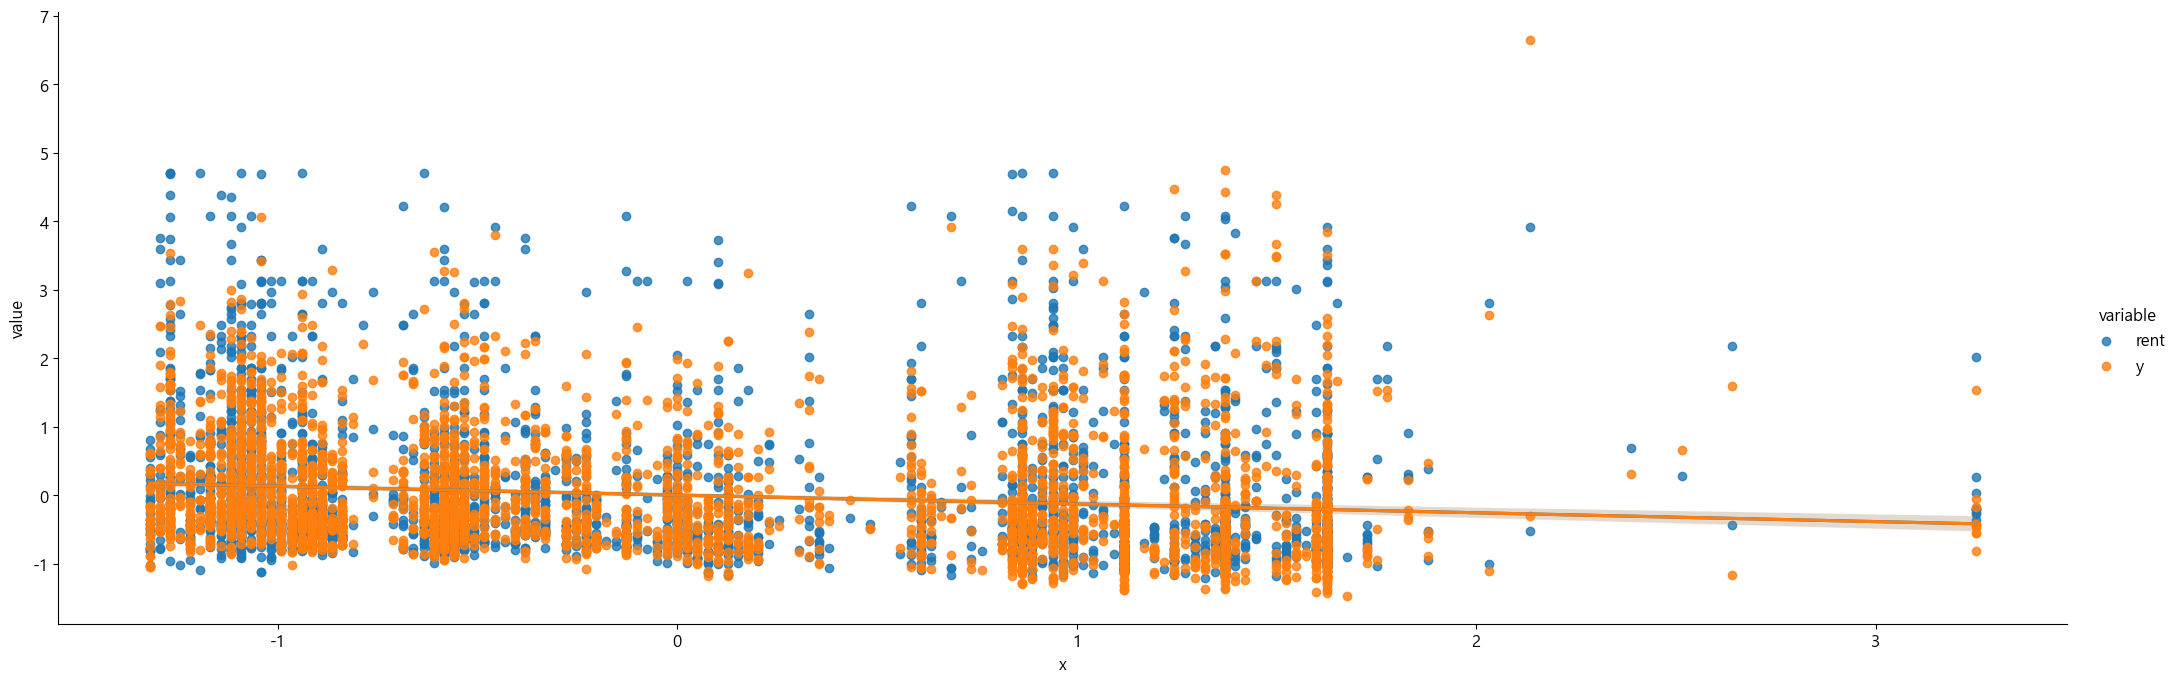

In [100]:
sb.lmplot(data=melt_df, x="x", y="value", hue="variable", height=7, aspect=3)
plt.show()
plt.close()